# Assignment 1

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import libraries
data=pd.read_csv('bts for gis practicals.csv')
df=pd.DataFrame(data)

#drop null values 
df=df.dropna()
df.head()


,Longitude,Latitude,BTSName,Classification,Technology
0,40.168942,-1.694245,Masalani,Rural,GSM
1,40.168942,-1.694245,Masalani,Urban,UMTS
2,40.168942,-1.694245,Masalani,Rural,UMTS
3,40.270139,-1.643889,Masalani Quarry,Rural,GSM
4,40.538167,-1.568011,Ijara,Rural,GSM


In [3]:
gsm=df.groupby('Technology').get_group('GSM')
umts=df.groupby('Technology').get_group('UMTS')
lte=df.groupby('Technology').get_group('LTE')

In [4]:
#remove duplicates

import warnings
warnings.filterwarnings('ignore')

gsm.drop_duplicates(subset=['BTSName'],keep='first',inplace=True)
umts.drop_duplicates(subset=['BTSName'],keep='first',inplace=True)
lte.drop_duplicates(subset=['BTSName'],keep='first',inplace=True)

In [5]:
#concat the dataframes
df1=pd.concat([gsm,umts,lte],axis=0)
df1.head()

,Longitude,Latitude,BTSName,Classification,Technology
0,40.168942,-1.694245,Masalani,Rural,GSM
3,40.270139,-1.643889,Masalani Quarry,Rural,GSM
4,40.538167,-1.568011,Ijara,Rural,GSM
5,40.038384,-1.497874,Hola_Town,Rural,GSM
9,40.024800,-1.497800,Hola_YU,Rural,GSM


# EXERCISE 2

# assignment 2

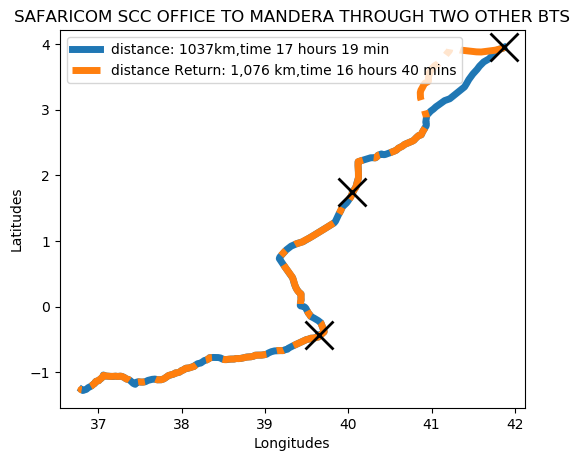

<Figure size 432x288 with 0 Axes>

In [6]:
#Opening google
import googlemaps
import polyline
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
with open ("APIKey1.txt","r") as apiKey:
      #Connect to the googlemaps api
        gmaps=googlemaps.Client(apiKey.read())
        result0 = gmaps.directions(origin="-1.2609441, 36.7988670",waypoints=[(-0.42581598, 39.65352795),(1.75174651, 40.04846739)],destination= "3.94899426, 41.86590617",mode="driving",departure_time=datetime.now())
        result1 = gmaps.directions(origin="3.94899426, 41.86590617",destination= "-1.2609441, 36.7988670",mode="driving",departure_time=datetime.now())
        
        distList = []
        timeList = []
        for x in range(3):
            distList.append(result0[0]['legs'][x]['distance']['value'])
            timeList.append(result0[0]['legs'][x]['duration']['value'])
          
        totalMin = divmod(sum(timeList), 60)[0]
        dist = divmod(sum(distList),1000)[0]
        hrs, mts = divmod(totalMin, 60)
        time = "{} hours {} min".format(hrs, mts)
      
        
        dist1=result1[0]['legs'][0]['distance']['text']
        time1=result1[0]['legs'][0]['duration']['text']
        
        line0=polyline.decode(result0[0]['overview_polyline']['points'])
        line1=polyline.decode(result1[0]['overview_polyline']['points'])
        
        #We need to invert the coordinates into(x,y) format rather than y,x format so as to plot on mpl
        xs=[xy[1] for xy in line0]
        ys=[xy[0] for xy in line0]
        xs1=[xy1[1] for xy1 in line1]
        ys1=[xy1[0] for xy1 in line1]
        
        #Plot the journey to and fro
        plt.figure(figsize=(6,5),dpi=100)
        plt.plot (xs,ys,label="distance: {}km,time {}".format(dist,time),linewidth=5.0)
        plt.plot (xs1,ys1,label="distance Return: {},time {}".format(dist1,time1),linewidth=5.0,linestyle='-.')
    
        #Plotting the start, end and waypoints

        plt.plot( 40.04846739,1.75174651 , marker='x' ,markerfacecolor='green',markersize=20,markeredgewidth=2,markeredgecolor='black')
        plt.plot( 39.65352795,-0.42581598 , marker='x',markerfacecolor='green',markersize=20,markeredgewidth=2,markeredgecolor='black')
        plt.plot(41.86590617,3.94899426, marker='x',markerfacecolor='blue',markersize=20,markeredgewidth=2,markeredgecolor='black')
        
        #Title and axis label
        plt.title("SAFARICOM SCC OFFICE TO MANDERA THROUGH TWO OTHER BTS")
        plt.xlabel("Longitudes")
        plt.ylabel("Latitudes")
        plt.legend()
        plt.show ()
        
        #Saving the image
        plt.savefig('best_route.png')

In [7]:
  result0

[{'bounds': {'northeast': {'lat': 3.9487592, 'lng': 41.8660626},
   'southwest': {'lat': -1.2740798, 'lng': 36.7987243}},
  'copyrights': 'Map data ©2019 Google',
  'legs': [{'distance': {'text': '373 km', 'value': 372668},
    'duration': {'text': '5 hours 25 mins', 'value': 19523},
    'end_address': 'Unnamed Road, Kenya',
    'end_location': {'lat': -0.4249146, 'lng': 39.6519205},
    'start_address': 'Safaricom Customer Care Centre, Nairobi, Kenya',
    'start_location': {'lat': -1.2613566, 'lng': 36.7987243},
    'steps': [{'distance': {'text': '0.1 km', 'value': 146},
      'duration': {'text': '1 min', 'value': 53},
      'end_location': {'lat': -1.2616837, 'lng': 36.7999894},
      'html_instructions': 'Head <b>east</b> toward <b>Parklands Rd</b>',
      'polyline': {'points': 'njuF_gr_FPw@JgAPqANk@'},
      'start_location': {'lat': -1.2613566, 'lng': 36.7987243},
      'travel_mode': 'DRIVING'},
     {'distance': {'text': '87 m', 'value': 87},
      'duration': {'text': '1 mi

In [8]:
  result1

[{'bounds': {'northeast': {'lat': 3.9487592, 'lng': 41.8660626},
   'southwest': {'lat': -1.2750762, 'lng': 36.7902466}},
  'copyrights': 'Map data ©2019 Google',
  'legs': [{'distance': {'text': '1,076 km', 'value': 1075871},
    'duration': {'text': '16 hours 40 mins', 'value': 59987},
    'duration_in_traffic': {'text': '17 hours 10 mins', 'value': 61803},
    'end_address': 'Safaricom Customer Care Centre, Nairobi, Kenya',
    'end_location': {'lat': -1.2613566, 'lng': 36.7987243},
    'start_address': 'Unnamed Road, Mandera, Kenya',
    'start_location': {'lat': 3.9487592, 'lng': 41.8660626},
    'steps': [{'distance': {'text': '0.1 km', 'value': 145},
      'duration': {'text': '1 min', 'value': 40},
      'end_location': {'lat': 3.948042, 'lng': 41.8649743},
      'html_instructions': 'Head <b>southwest</b>',
      'polyline': {'points': 'wfbW{}o~Fx@vAR\\`AbB'},
      'start_location': {'lat': 3.9487592, 'lng': 41.8660626},
      'travel_mode': 'DRIVING'},
     {'distance': {'te

In [9]:
#From Nakuru to Mandera geojson route calculation
import ast
import geojson
with open('geo3.txt', 'r') as data0:
    route = ast.literal_eval(data0.read())
    
    #extract and decode the polyline
    line_coord = polyline.decode(route[0]['overview_polyline']['points']) #format is lat, long(y,x)
    crs = {"type":"name", "properties":{'name':'EPSG:4326'}}
    
    #Defining the properties
    properties = {"name": "SCC to Mandera", "LengthKM":1159 ,"timeH":'19 hours 53 mins'}
   
    #Saving the geojson file
    with open('route2.geojson', 'w')  as r:
        routejs = geojson.LineString([(xy[1], xy[0]) for xy in line_coord], crs = crs)
        
        #dump routejs to geojson
        geojson.dump(geojson.Feature(geometry = routejs, properties = properties), r)

In [10]:
#From Mandera to Nairobi geojson route calculation
import ast
import geojson
with open('geo2.txt', 'r') as data1: 
    route = ast.literal_eval(data1.read())
    
    #extract and decode the polyline
    line_coord = polyline.decode(route[0]['overview_polyline']['points']) #format is lat, long(y,x)
    crs = {"type":"name", "properties":{'name':'EPSG:4326'}}
    
    #Saving the geojson file
    properties1 = {"name": "Mandera to Nairobi", "LengthKM":935 ,"timeH":'17 hours 43 mins'}
    with open('route1.geojson', 'w')  as r:
        routejs = geojson.LineString([(xy[1], xy[0]) for xy in line_coord], crs = crs)
        
        #dump routejs to geojson
        geojson.dump(geojson.Feature(geometry = routejs, properties = properties), r)

# EXERCISE 3

In [11]:
#building geojson file
#import libraries
import ast
import geojson
import polyline

In [12]:
with open ("saf_to_mandera.txt",'r') as data:
    route=ast.literal_eval(data.read())

In [13]:
crs={"type":"name","properties":{"name":"EPSG:4326"}}
# attribute of the line 
properties= {"name":"saf to mandera","LengthKM":"1037", "timeH":"16hrs 15mins"}
with open ('route.geojson','w') as r : 
    lineCoords=polyline.decode(route[0]['overview_polyline']['points'])
    routejs=geojson.LineString([(xy[1],xy[0]) for xy in lineCoords],crs=crs)#trying to change to  (long,lat)
    geojson.dump(geojson.Feature(geometry=routejs, properties=properties),r)
    


In [14]:
import gtts
from gtts import gTTS
from bs4 import BeautifulSoup

#without beautifulsoup
direction=route [0]['legs'][0]['steps'][0]['html_instructions']
sound=gTTS(text=direction,slow=False,lang='en')
sound.save('one_tune.mp3')

In [15]:
#with beautifulsop

soup=BeautifulSoup(direction,'html.parser')
sound1=gTTS(text=soup.text,lang='en',slow=False)
sound1.save('soup-one.mp3')

# assignment 3

#SAFARICOM TO MANDERA  route

In [16]:
#library import
import folium

In [17]:
with open("saf_to_mandera.txt",'r') as data:
    route=ast.literal_eval(data.read())
    
#get line co-ordinates
coords=route[0]['overview_polyline']['points']

In [18]:
#decode coordinates
coords=polyline.decode(coords)
coords

[(-1.2588, 36.78598),
 (-1.2687, 36.80586),
 (-1.27288, 36.81417),
 (-1.26765, 36.8186),
 (-1.26299, 36.83908),
 (-1.25082, 36.86101),
 (-1.21434, 36.89756),
 (-1.18919, 36.93058),
 (-1.15572, 36.95998),
 (-1.1388, 36.96942),
 (-1.12966, 36.98688),
 (-1.12563, 37.00233),
 (-1.11339, 37.01183),
 (-1.08854, 37.03599),
 (-1.06589, 37.05207),
 (-1.04199, 37.06173),
 (-1.04361, 37.0714),
 (-1.0549, 37.08682),
 (-1.05928, 37.12162),
 (-1.06085, 37.157),
 (-1.05559, 37.19084),
 (-1.05987, 37.25624),
 (-1.05778, 37.2738),
 (-1.07201, 37.30575),
 (-1.09521, 37.33067),
 (-1.1053, 37.35471),
 (-1.12348, 37.38309),
 (-1.14773, 37.4054),
 (-1.17232, 37.42767),
 (-1.17755, 37.44434),
 (-1.15963, 37.45118),
 (-1.14331, 37.46313),
 (-1.14366, 37.49187),
 (-1.1463, 37.53711),
 (-1.14377, 37.55374),
 (-1.12366, 37.58878),
 (-1.10386, 37.64616),
 (-1.1006, 37.68637),
 (-1.11174, 37.70839),
 (-1.11165, 37.73732),
 (-1.10478, 37.76863),
 (-1.08594, 37.80452),
 (-1.05592, 37.82902),
 (-1.0359, 37.86865),
 (

In [19]:
#get distance and time

distance=route[0]['legs'][0]['distance']['text']
time=route[0]['legs'][0]['duration']['text']
time

'16 hours 51 mins'

In [20]:
#get start,end and avarage values
avalat=sum([xy[0] for xy in coords])/len([xy[0] for xy in coords])
avalon=sum([xy[1] for xy in coords])/len([xy[1] for xy in coords])
avalon

39.480575909090916

In [21]:
#start and end points

start,end=coords[0],coords[-1]


In [22]:
#create map..using avarage lat/lon to center our map along the line/route
safmand=folium.Map(location=[avalat,avalon],tiles='CartoDB dark_matter',zoom_start=5)

In [23]:
#create polyline
from collections import namedtuple
folium.PolyLine(coords,color='red',weight=10,opacity=0.9).add_to(safmand)



In [24]:
#add markers
folium.Marker(start,icon=folium.Icon(icon='cloud',color='blue'),tooltip='safaricom HQ').add_to(safmand)
folium.Marker(end,icon=folium.Icon(icon='cloud',color='green'),tooltip='Mandera').add_to(safmand)

In [25]:
#add tile layers
folium.TileLayer(tiles="Stamen Toner", name='Toner').add_to(safmand)
folium.TileLayer(tiles="OpenStreetMap", name='Streemap').add_to(safmand)
folium.TileLayer(tiles="Mapbox Bright", name='Mapbox').add_to(safmand)

folium.LayerControl().add_to(safmand)


In [26]:
#save
safmand.save('safmandera.html')

In [27]:
safmand

# MAPPING ALL BTS WITH TECHNOLOGY TYPE AS LAYER

In [28]:
#avarage longitude
avlon=df.Longitude.mean()

In [29]:
#avarage latitude
avlat=df.Latitude.mean()

In [30]:
#medium lat and lon
print(df.Longitude.median())
df.Latitude.median()

37.45363889


-0.430333333

In [31]:
#folium map
bts=folium.Map(location=[avlat,avlon],zoom_start=10)



In [32]:
#feature group
gsm1=folium.FeatureGroup(name='GSM')
umts1=folium.FeatureGroup(name='UMTS')
lte1=folium.FeatureGroup(name='LTE')

In [33]:
#add layers
for i in range(0,len(gsm)):
    folium.Marker([gsm.iloc[i]['Latitude'],gsm.iloc[i]['Longitude']],
                  icon=folium.Icon(color='red',icon='ok-sign'),tooltip=gsm.iloc[i]['BTSName']).add_to(gsm1)
                   

for i in range(0,len(umts)):
    folium.Marker([umts.iloc[i]['Latitude'],umts.iloc[i]['Longitude']],
                  icon=folium.Icon(color='green'),tooltip=umts.iloc[i]['BTSName']).add_to(umts1)
                   
        
for i in range(0,len(lte)):
    folium.Marker([lte.iloc[i]['Latitude'],lte.iloc[i]['Longitude']],
                  icon=folium.Icon(color='blue',icon='cloud'),tooltip=lte.iloc[i]['BTSName']).add_to(lte1)

gsm1.add_to(bts)
umts1.add_to(bts)
lte1.add_to(bts)


bts.add_child(folium.LatLngPopup())
folium.LayerControl().add_to(bts)    


In [34]:
#save fig
bts.save('BTS.html')

In [35]:
#show map
bts

# EXERCISE 4

#### CHROPLETH MAPS

Web scraping data

In [36]:

import requests #http protocol

In [37]:
url="https://www.kenya-today.com/politics/kenya-election-results-2013"
source=requests.get(url).text
source

'<!DOCTYPE html>\n<html lang="en-US" prefix="og: http://ogp.me/ns#">\n<head>\n<meta charset="UTF-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1" />\n<title>Official Election Results, County By County Tally</title>\n<script>(function(d, s, id){\n\t\t\t\t var js, fjs = d.getElementsByTagName(s)[0];\n\t\t\t\t if (d.getElementById(id)) {return;}\n\t\t\t\t js = d.createElement(s); js.id = id;\n\t\t\t\t js.src = "//connect.facebook.net/en_US/sdk.js#xfbml=1&version=v2.6";\n\t\t\t\t fjs.parentNode.insertBefore(js, fjs);\n\t\t\t   }(document, \'script\', \'facebook-jssdk\'));</script>\n\n<meta name="description" content="Kenya Today|Official election results, 4 march 2013 ID Name Registered Dida, Mohamed Abduba Karua, Martha Wangari Kenneth, Peter Kenyatta, Uhuru Kiyiapi, James" />\n<link rel="canonical" href="https://www.kenya-today.com/politics/kenya-election-results-2013" />\n<meta property="og:locale" content="en_US" />\n<meta property="og:type" content="article" 

In [38]:
##pass to beautifulsoup(parses html and xml)
bsoup=BeautifulSoup(source,'html.parser')
tables=bsoup.findAll('table')
rows=tables[0].find_all('tr')
rows[0]

<tr>
<td valign="bottom">ID</td>
<td valign="bottom">Name</td>
<td valign="bottom">Registered</td>
<td valign="bottom">Dida, Mohamed Abduba</td>
<td valign="bottom">Karua, Martha Wangari</td>
<td valign="bottom">Kenneth, Peter</td>
<td valign="bottom">Kenyatta, Uhuru</td>
<td valign="bottom">Kiyiapi, James Legilisho</td>
<td valign="bottom">Mudavadi, Musalia</td>
<td valign="bottom">Muite, Paul Kibugi</td>
<td valign="bottom">Odinga, Raila</td>
<td valign="bottom">Total</td>
</tr>

In [39]:
data=[]
for row in rows:
    col=row.find_all('td')
    record=[c.text for c in col]
    data.append(record)

In [40]:
data1=pd.DataFrame(data[1:-2],columns=data[0])
data1.columns

Index(['ID', 'Name', 'Registered', 'Dida, Mohamed Abduba',
       'Karua, Martha Wangari', 'Kenneth, Peter', 'Kenyatta, Uhuru',
       'Kiyiapi, James Legilisho', 'Mudavadi, Musalia', 'Muite, Paul Kibugi',
       'Odinga, Raila', 'Total'],
      dtype='object')

In [41]:
data1['Registered']=data1['Registered'].str.replace(",","")

In [42]:
col1=['Kenyatta, Uhuru','Odinga, Raila','Total']
for x in col1:
    data1[x]=data1[x].str.replace(",","").astype(int)
    

In [43]:
data1['Registered']=data1['Registered'].astype(int)

In [44]:
#compute turnover
data1['turn-out']=(data1['Total']/data1['Registered'])*100

#votes for each candidate
data1['Uhuru']=(data1['Kenyatta, Uhuru']/data1['Registered'])*100
data1['Raila']=(data1['Odinga, Raila']/data1['Registered'])*100

In [45]:
#true competitors
fun=data1[['Name','Raila','Uhuru','turn-out']]

In [46]:
import geopandas as gpd

In [47]:
#import shapefile

shp=gpd.read_file('ke_county.shp')

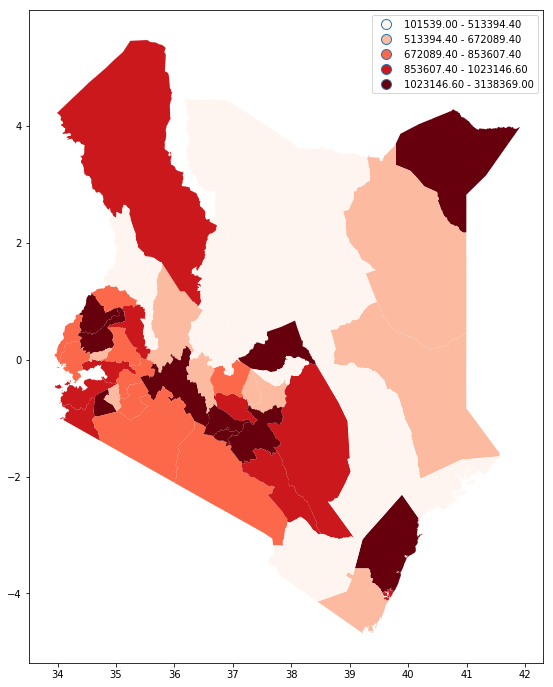

In [48]:
#plot map
%matplotlib inline

shp.plot(linewidth=0.1,column='pop 2009',legend=True,cmap='Reds',figsize=(15,12),k=5,scheme='QUANTILES')

#### Fuzz matching

In [49]:
import difflib

In [50]:
shp['county'].unique()

array(['Baringo', "Murang'a", 'Bomet', 'Bungoma', 'Busia',
       'Elgeyo-marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo',
       'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga',
       'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu',
       'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori',
       'Mombasa', 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira',
       'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta',
       'Tana River', 'Tharaka-nithi', 'Trans Nzoia', 'Turkana',
       'Uasin Gishu', 'Vihiga', 'Wajir', 'West Pokot'], dtype=object)

In [51]:
fun.Name.unique()

array(['Mombasa', 'Kwale', 'Kilifi', 'Tana River', 'Lamu', 'Taita Taveta',
       'Garissa', 'Wajir', 'Mandera', 'Marsabit', 'Isiolo', 'Meru',
       'Tharaka – Nithi', 'Embu', 'Kitui', 'Machakos', 'Makueni',
       'Nyandarua', 'Nyeri', 'Kirinyaga', 'Murang’a', 'Kiambu', 'Turkana',
       'West Pokot', 'Samburu', 'Trans Nzoia', 'Uasin Gishu',
       'Elgeyo / Marakwet', 'Nandi', 'Baringo', 'Laikipia', 'Nakuru',
       'Narok', 'Kajiado', 'Kericho', 'Bomet', 'Kakamega', 'Vihiga',
       'Bungoma', 'Busia', 'Siaya', 'Kisumu', 'Homa Bay', 'Migori',
       'Kisii', 'Nyamira', 'Nairobi City'], dtype=object)

In [52]:
shp['Name']=shp['county'].map(lambda x: difflib.get_close_matches(x,data1['Name'])[0])

In [53]:
shp.Name

0               Baringo
1              Murang’a
2                 Bomet
3               Bungoma
4                 Busia
5     Elgeyo / Marakwet
6                  Embu
7               Garissa
8              Homa Bay
9                Isiolo
10              Kajiado
11             Kakamega
12              Kericho
13               Kiambu
14               Kilifi
15            Kirinyaga
16                Kisii
17               Kisumu
18                Kitui
19                Kwale
20             Laikipia
21                 Lamu
22             Machakos
23              Makueni
24              Mandera
25             Marsabit
26                 Meru
27               Migori
28              Mombasa
29         Nairobi City
30               Nakuru
31                Nandi
32                Narok
33              Nyamira
34            Nyandarua
35                Nyeri
36              Samburu
37                Siaya
38         Taita Taveta
39           Tana River
40      Tharaka – Nithi
41          Tran

In [54]:
#merge fun and shp on Name
data1=pd.merge(shp,fun,on='Name')

In [55]:
data1.head()

,gid,county,pop 2009,lf_endemic,country,counts,var1_class,gsm count,geometry,Name,Raila,Uhuru,turn-out
0,1,Baringo,555561,No,Kenya,2,2,13.0,"POLYGON ((35.78413003162505 1.652483862137646,...",Baringo,8.536564,79.749846,90.035300
1,29,Murang'a,942581,No,Kenya,1,2,NaN,(POLYGON ((37.14475029160634 -1.05031012815712...,Murang’a,2.277179,89.729949,93.031108
2,2,Bomet,730129,No,Kenya,1,2,NaN,"POLYGON ((35.45191774949814 -0.36477354274942,...",Bomet,4.146094,83.413643,89.441587
3,3,Bungoma,1375063,No,Kenya,1,3,NaN,"POLYGON ((34.62083036980981 1.099421636425453,...",Bungoma,45.173244,10.473077,84.221926
4,4,Busia,743082,No,Kenya,1,2,9.0,(POLYGON ((33.91368549186415 0.098257528656488...,Busia,75.271483,3.257396,87.008217


In [56]:
data1[['county','Name']]

,county,Name
0,Baringo,Baringo
1,Murang'a,Murang’a
2,Bomet,Bomet
3,Bungoma,Bungoma
4,Busia,Busia
5,Elgeyo-marakwet,Elgeyo / Marakwet
6,Embu,Embu
7,Garissa,Garissa
8,Homa Bay,Homa Bay
9,Isiolo,Isiolo


Text(0.5,1,'VOTER TURN-OUT 2013')

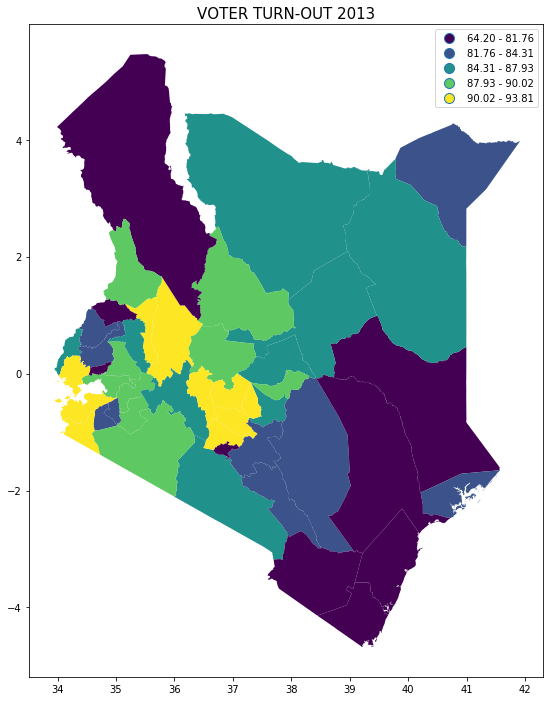

In [57]:
#plot map
data1.plot(column='turn-out',legend=True,figsize=(15,12),k=5,scheme='QUANTILES')
plt.title('VOTER TURN-OUT 2013',fontsize=15)

In [60]:
#mapping for winner of every county
R_U=[]
R=data1['Raila']
U=data1['Uhuru']

for a,b in zip(R,U):
    if a> b:
        k='RAILA'
        R_U.append(k)
    else:
        k='UHURU'
        R_U.append(k)
data1['WINS']=R_U  

Text(0.5,1,'RAILA VS UHURU ELECTION OUTCOME IN 2013')

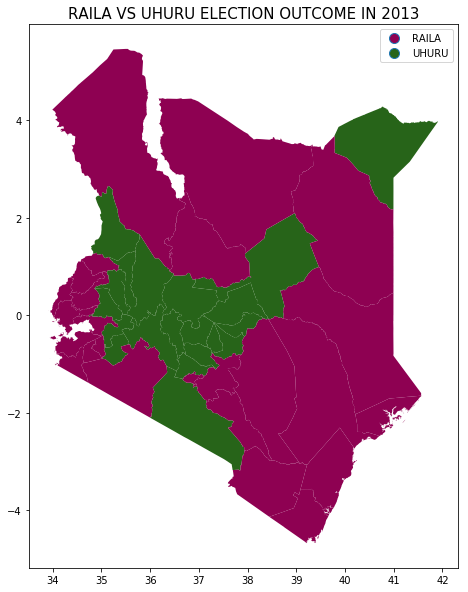

In [61]:
data1.plot(column='WINS',figsize=(15,10),legend=True,cmap='PiYG')
plt.title('RAILA VS UHURU ELECTION OUTCOME IN 2013',fontsize=15)